In [62]:
from suaBibSignal import *
import numpy as np
import sounddevice as sd
import soundfile as sf
import matplotlib.pyplot as plt
import scipy
import time

In [63]:
fs = 44100
frequency_AM = 14000
sd.default.samplerate = fs
sd.default.channels = 1
signal = signalMeu()

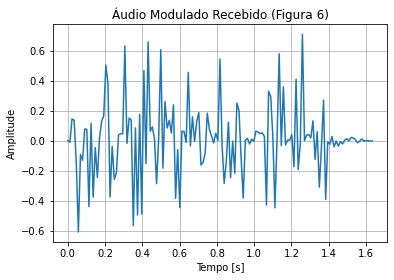

In [64]:
audio_modulated, samplerate = sf.read('./Waves/oh-my-god-meme-modulated.wav')
samples_audio = len(audio_modulated)
duration = samples_audio / fs
t_domain = np.linspace(0, duration, samples_audio)

plt.figure()
plt.plot(t_domain[::500], audio_modulated[::500])
plt.title('Áudio Modulado Recebido (Figura 6)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

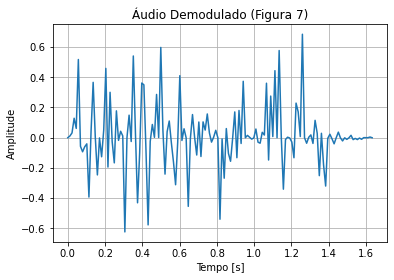

In [65]:
#desmodulando o audio modulado
A = 1
W = 2*np.pi*frequency_AM
sine = A*np.sin(W*t_domain)
audio_demodulated = audio_modulated*sine

plt.figure()
plt.plot(t_domain[::500], audio_demodulated[::500])
plt.title('Áudio Demodulado (Figura 7)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

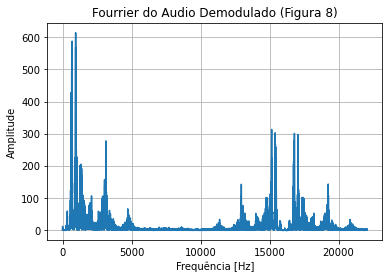

In [66]:
x, y = signal.calcFFT(audio_demodulated, fs)

# plota o grafico
plt.figure()
plt.plot(x, np.abs(y))
plt.title('Fourrier do Audio Demodulado (Figura 8)')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude')
plt.xticks(np.arange(0, 22000, 5000))
plt.grid()
plt.show()

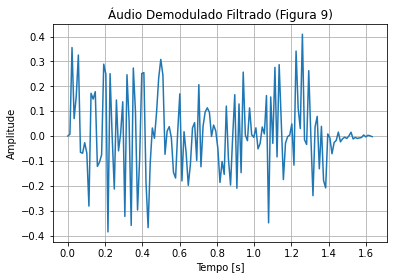

In [67]:
b, a = scipy.signal.butter(4, 3000, 'lowpass', fs=samplerate)
filtered_audio = scipy.signal.filtfilt(b, a, audio_demodulated)
plt.figure()
plt.plot(t_domain[::500], filtered_audio[::500])
plt.title('Áudio Demodulado Filtrado (Figura 9)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

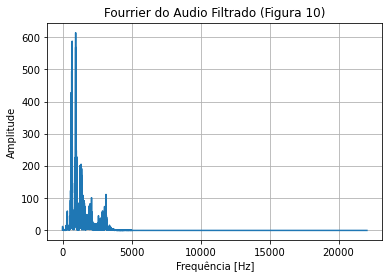

In [68]:
x, y = signal.calcFFT(filtered_audio, fs)

# plota o grafico
plt.figure()
plt.plot(x, np.abs(y))
plt.title('Fourrier do Audio Filtrado (Figura 10)')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude')
plt.xticks(np.arange(0, 22000, 5000))
plt.grid()
plt.show()

In [69]:
sd.play(filtered_audio, fs)